# Imports

In [163]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [164]:
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
import subprocess

In [165]:
from src.variables import energyplus_install_dir
from src.parsing import parse_energyplus_datetime_string, print_subprocess_results

# Simulation

In [166]:
idf_file_relative = Path("./in.idf")
weather_file_realtive = Path("../eSim_workshop/weatherfiles/USA_IL_Chicago-OHare.Intl.AP.725300_TMY3.epw")
output_relative_directory='./sim'

In [167]:
result = subprocess.run([f"energyplus", "--readvars",
                         "--output-directory", f"{output_relative_directory}",
                         "--weather", f"{weather_file_realtive}",
                         f"{idf_file_relative}"
                        ],
                        capture_output=True
                       )

In [168]:
print_subprocess_results(result)

---ARGS---
 ['energyplus', '--readvars', '--output-directory', './sim', '--weather', '..\\eSim_workshop\\weatherfiles\\USA_IL_Chicago-OHare.Intl.AP.725300_TMY3.epw', 'in.idf']
---RETURNCODE---
 0 (SUCCESS)
---STDOUT---
 EnergyPlus Starting
EnergyPlus, Version 22.1.0-ed759b17ee, YMD=2022.12.22 10:06
Adjusting Air System Sizing
Adjusting Standard 62.1 Ventilation Sizing
Initializing Simulation
Reporting Surfaces
Beginning Primary Simulation
Initializing New Environment Parameters
Warming up {1}
Warming up {2}
Warming up {3}
Warming up {4}
Warming up {5}
Warming up {6}
Warming up {7}
Warming up {8}
Warming up {9}
Warming up {10}
Warming up {11}
Warming up {12}
Warming up {13}
Warming up {14}
Warming up {15}
Warming up {16}
Warming up {17}
Warming up {18}
Warming up {19}
Warming up {20}
Warming up {21}
Warming up {22}
Warming up {23}
Warming up {24}
Warming up {25}
Starting Simulation at 01/01/2006 for RUN PERIOD 1
Updating Shadowing Calculations, Start Date=01/21/2006
Continuing Simulatio

# Results

In [169]:
df=pd.read_csv("./sim/eplusout.csv",
               parse_dates=[0],
               index_col=[0],
               date_parser=parse_energyplus_datetime_string
              )

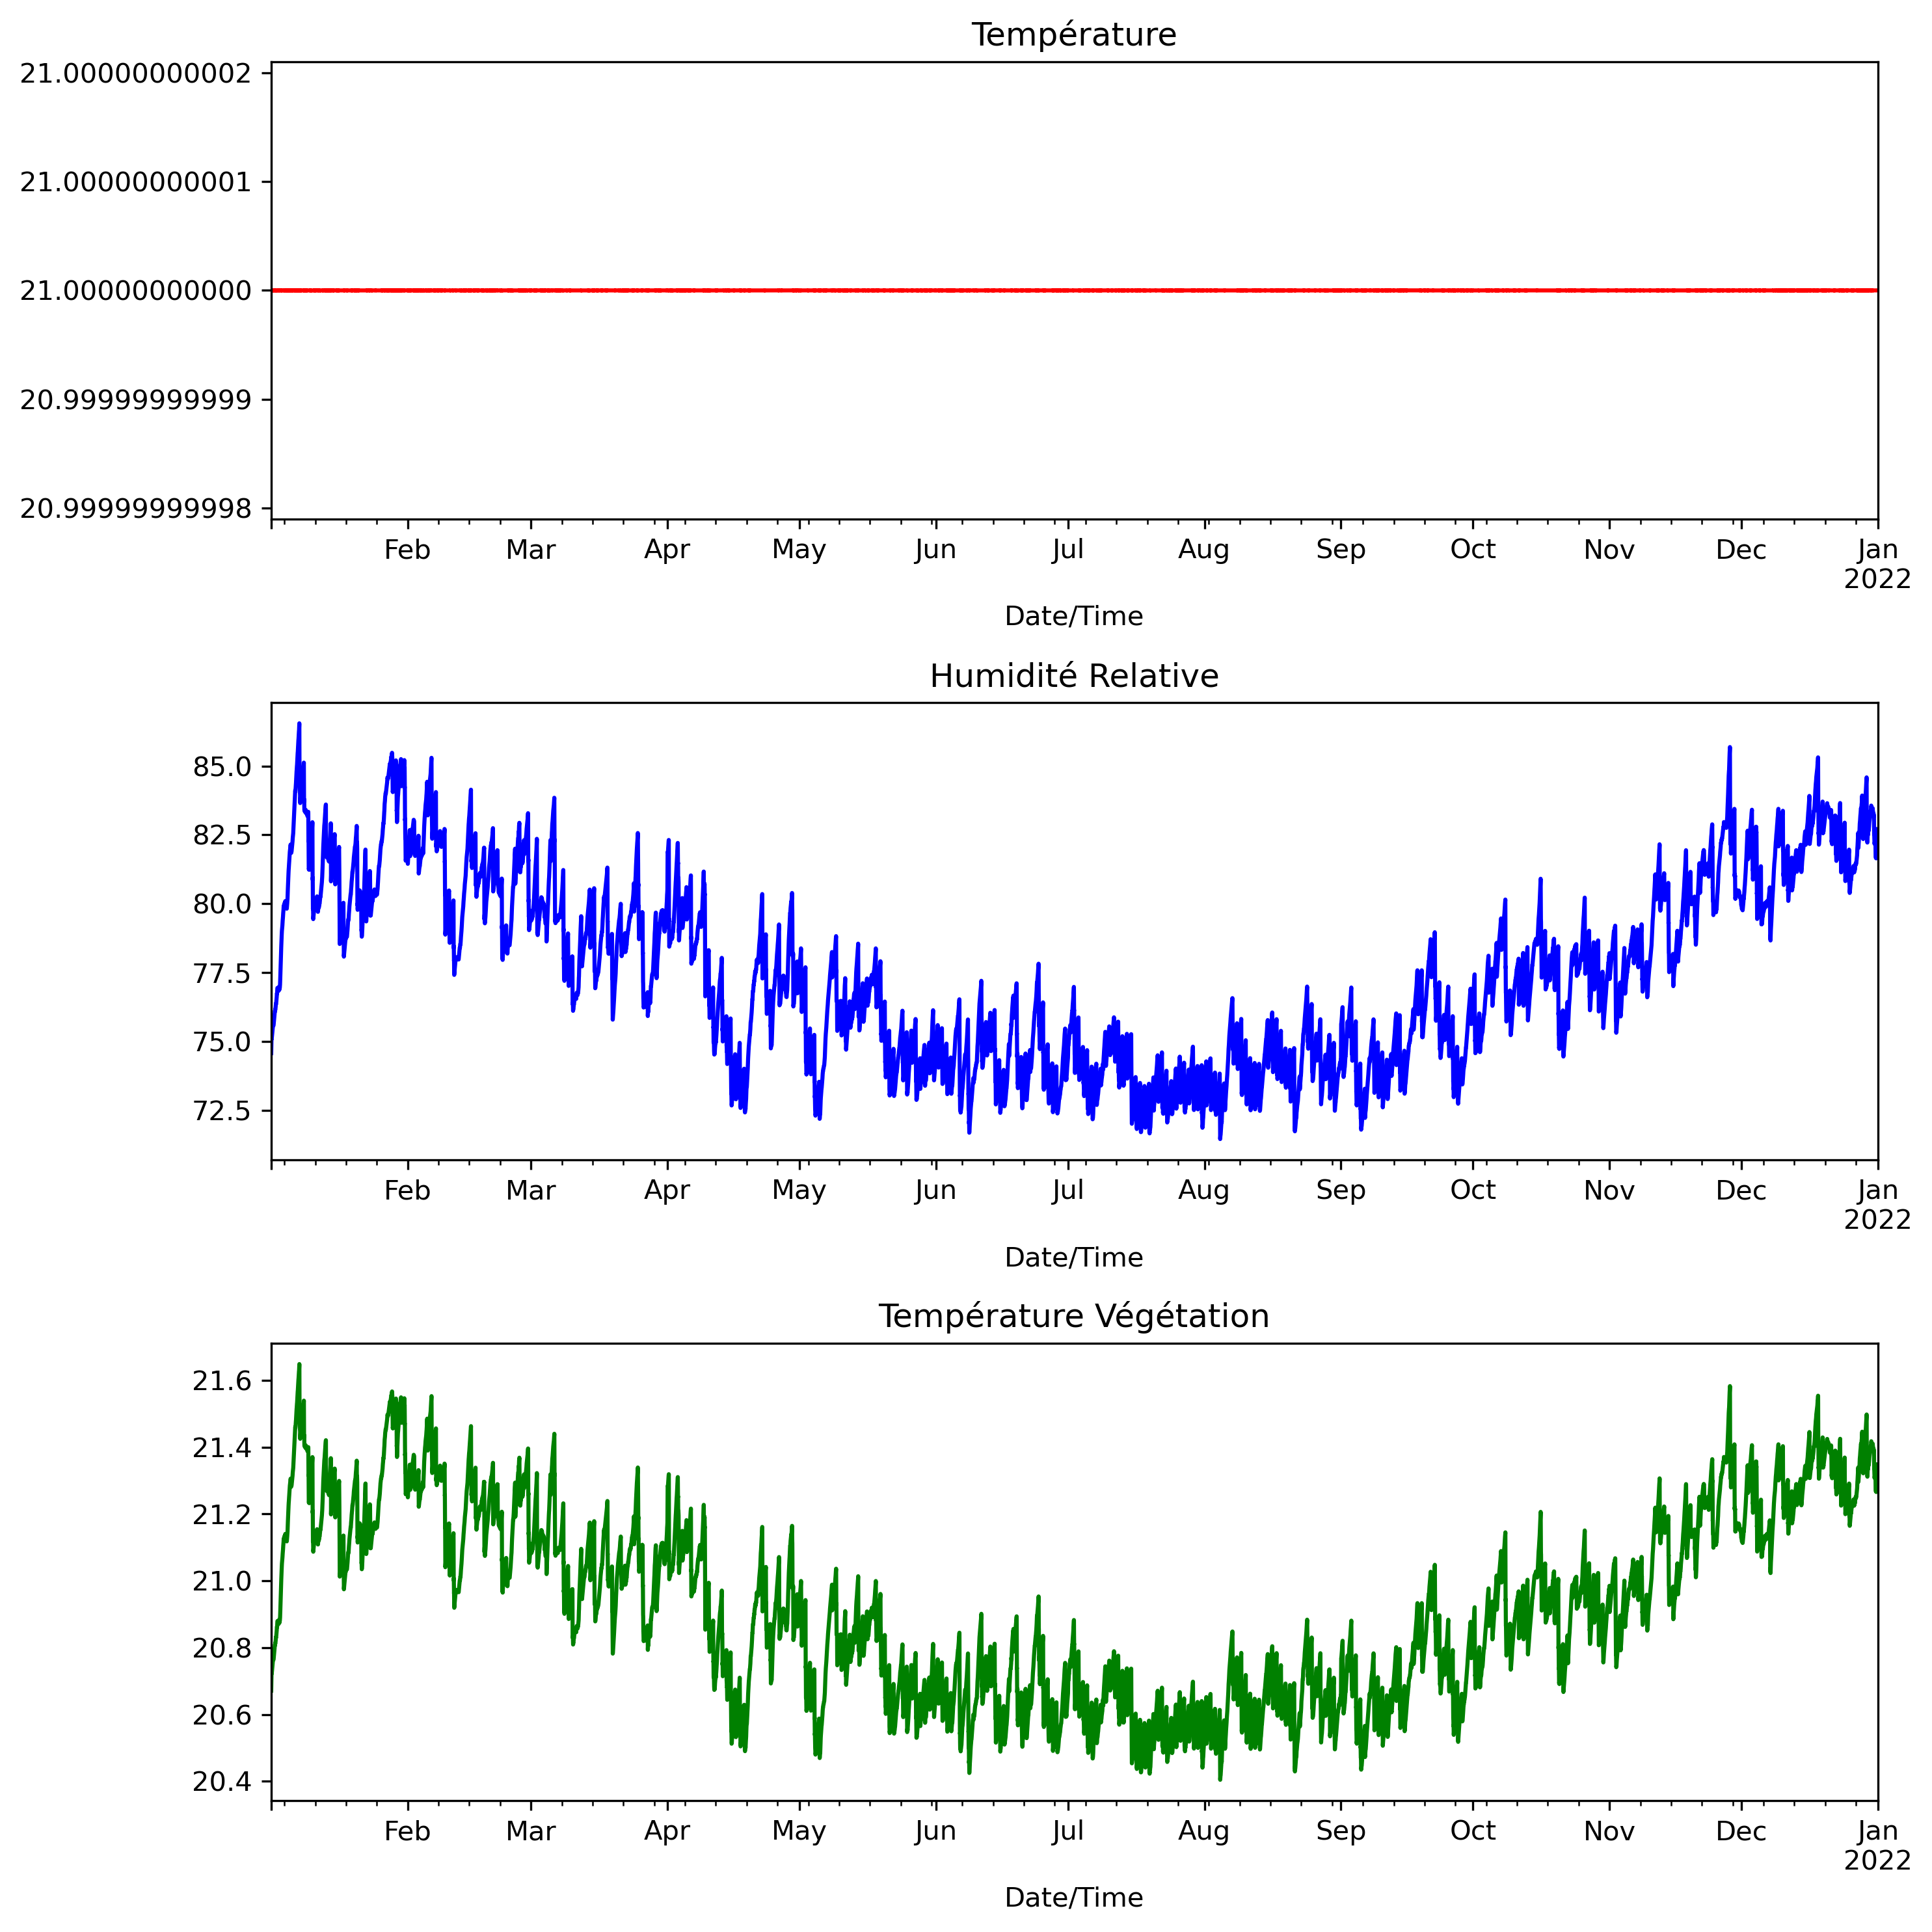

In [171]:
fig, ax = plt.subplots(3,1,figsize = (10,10),dpi=300)
ax[0].ticklabel_format(useOffset=False)
ax[0].set_title("Température")
ax[1].set_title("Humidité Relative")
ax[2].set_title("Température Végétation")
df.iloc[:,0].plot(ax=ax[0], color='red')
df.iloc[:,1].plot(ax=ax[1], color='blue')
df.iloc[:,2].plot(ax=ax[2], color='green')
plt.tight_layout()
plt.show()